# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


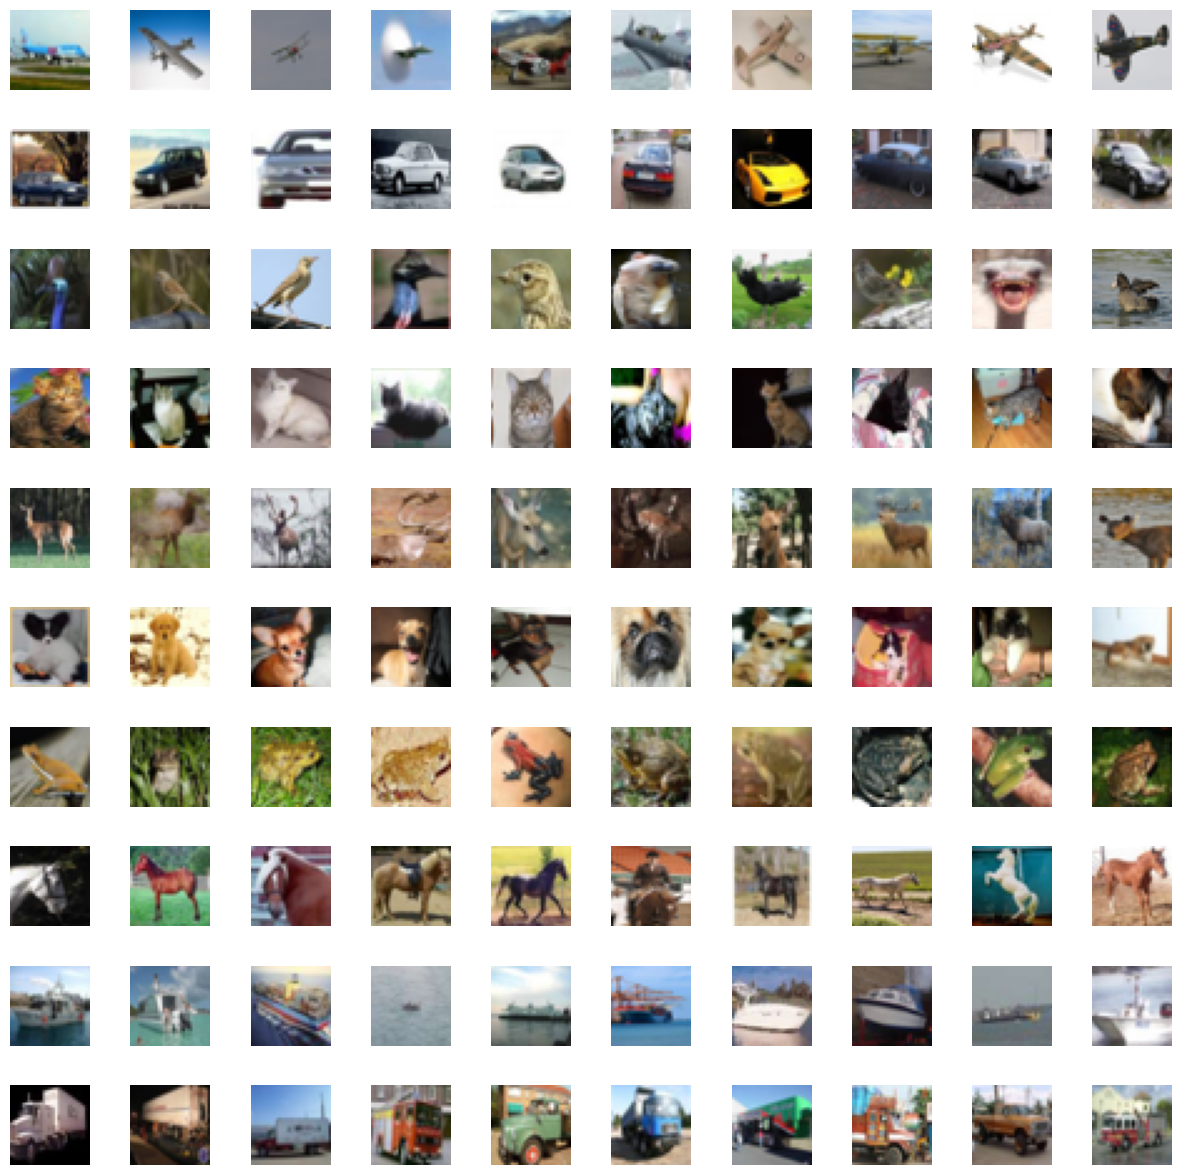

In [2]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create a 10x10 grid plot of random samples
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):
    class_indices = np.where(y_train == i)[0]  # Indices of images in the class
    selected_indices = np.random.choice(class_indices, 10, replace=False)  # Select 10 random samples
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(x_train[selected_indices[j]])
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(class_names[i], rotation=0, size=10, labelpad=50)

plt.show()

In [3]:
# One-hot encoding of labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

*   Plot the cross entropy loss curve and the accuracy curve

In [24]:
model_simple.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.1850 - loss: 2.2438 - val_accuracy: 0.2828 - val_loss: 2.0846
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2856 - loss: 2.0497 - val_accuracy: 0.3176 - val_loss: 1.9723
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3128 - loss: 1.9575 - val_accuracy: 0.3290 - val_loss: 1.9129
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3333 - loss: 1.9041 - val_accuracy: 0.3456 - val_loss: 1.8715
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3505 - loss: 1.8628 - val_accuracy: 0.3526 - val_loss: 1.8416
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3608 - loss: 1.8362 - val_accuracy: 0.3540 - val_loss: 1.8256
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3713 - loss: 1.8042 - val_accuracy: 0.3705 - val_loss: 1.7928
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3718 - loss: 1.7981 - val_accuracy: 0.3833 - v

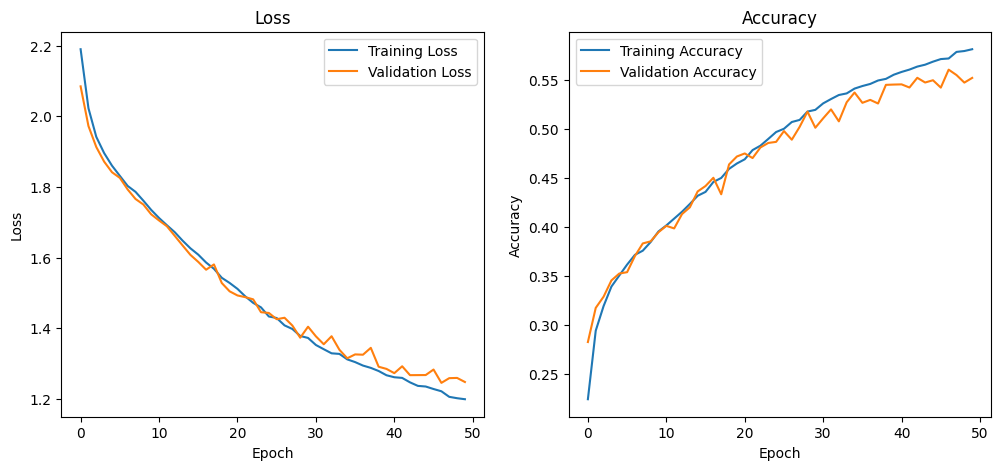

In [25]:
history_simple = model_simple.fit(x_train, y_train_onehot,
                                  epochs=50, batch_size=512,
                                  validation_data=(x_test, y_test_onehot))

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [26]:
from keras.backend import clear_session
clear_session()

In [27]:
model_vgg = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [28]:
model_vgg.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.1751 - loss: 2.2638 - val_accuracy: 0.2229 - val_loss: 2.1158
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2580 - loss: 2.0769 - val_accuracy: 0.2858 - val_loss: 2.0135
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3011 - loss: 1.9760 - val_accuracy: 0.3168 - val_loss: 1.9314
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3263 - loss: 1.9161 - val_accuracy: 0.3454 - val_loss: 1.8553
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3510 - loss: 1.8481 - val_accuracy: 0.3740 - val_loss: 1.7917
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3723 - loss: 1.8025 - val_accuracy: 0.3864 - val_loss: 1.7489
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3781 - loss: 1.7656 - val_accuracy: 0.3859 - val_loss: 1.7462
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3879 - loss: 1.7371 - val_accuracy: 0.3942 - v

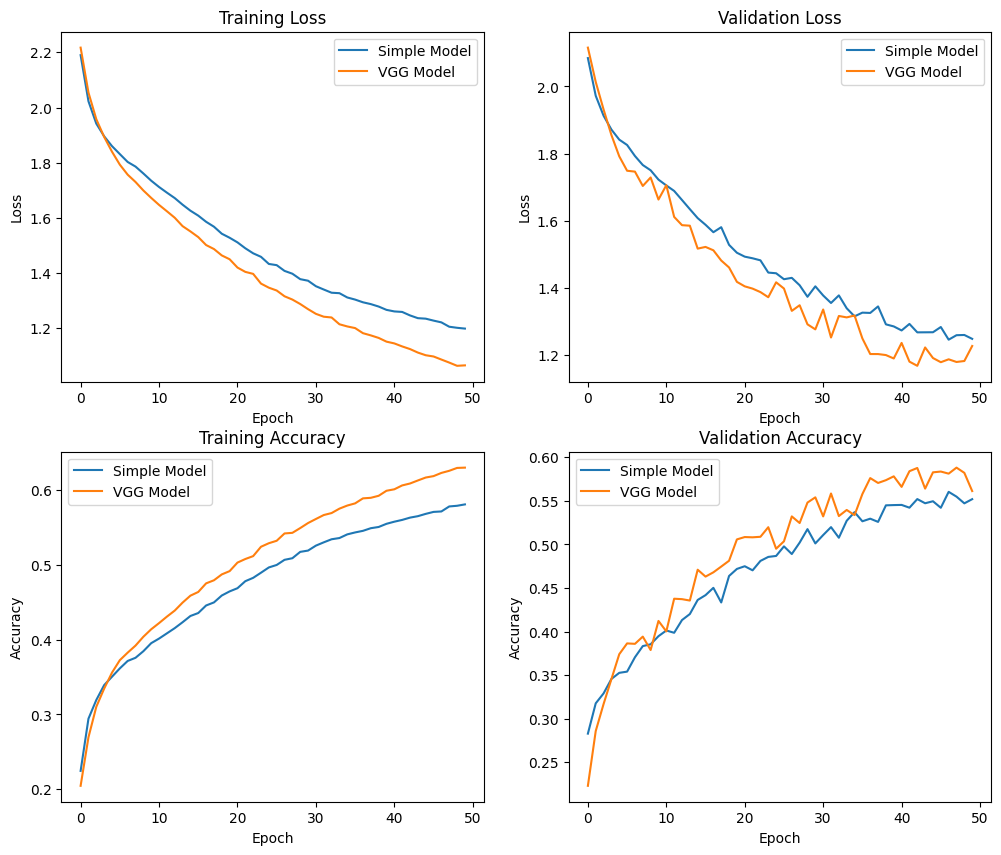

In [29]:
history_vgg = model_vgg.fit(x_train, y_train_onehot,
                            epochs=50, batch_size=512,
                            validation_data=(x_test, y_test_onehot))


plt.figure(figsize=(12, 10))

# Plot training loss
plt.subplot(2, 2, 1)
plt.plot(history_simple.history['loss'], label='Simple Model')
plt.plot(history_vgg.history['loss'], label='VGG Model')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(2, 2, 2)
plt.plot(history_simple.history['val_loss'], label='Simple Model')
plt.plot(history_vgg.history['val_loss'], label='VGG Model')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(2, 2, 3)
plt.plot(history_simple.history['accuracy'], label='Simple Model')
plt.plot(history_vgg.history['accuracy'], label='VGG Model')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(2, 2, 4)
plt.plot(history_simple.history['val_accuracy'], label='Simple Model')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [ ]:
# Your code here :

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5605 - loss: 1.2196
Test Accuracy: 0.56
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


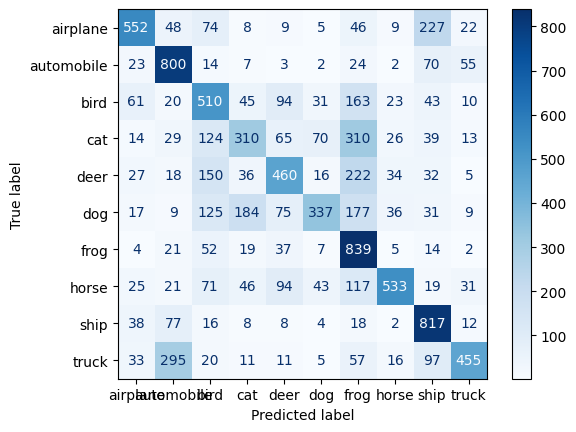

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test accuracy
test_loss, test_accuracy = model_vgg.evaluate(x_test, y_test_onehot)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion matrix
y_pred = np.argmax(model_vgg.predict(x_test), axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [31]:
from keras.backend import clear_session
clear_session()

In [32]:
model_vgg_extended = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5865 - loss: 1.1885 - val_accuracy: 0.5598 - val_loss: 1.2288
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5854 - loss: 1.1873 - val_accuracy: 0.5624 - val_loss: 1.2321
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5831 - loss: 1.1866 - val_accuracy: 0.5721 - val_loss: 1.2166
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5904 - loss: 1.1761 - val_accuracy: 0.5360 - val_loss: 1.3021
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5851 - loss: 1.1903 - val_accuracy: 0.5559 - val_loss: 1.2337
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5896 - loss: 1.1763 - val_accuracy: 0.5707 - val_loss: 1.2163
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5960 - loss: 1.1607 - val_accuracy: 0.5678 - val_loss: 1.2343
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5946 - loss: 1.1593 - val_accuracy: 0.5700 - v

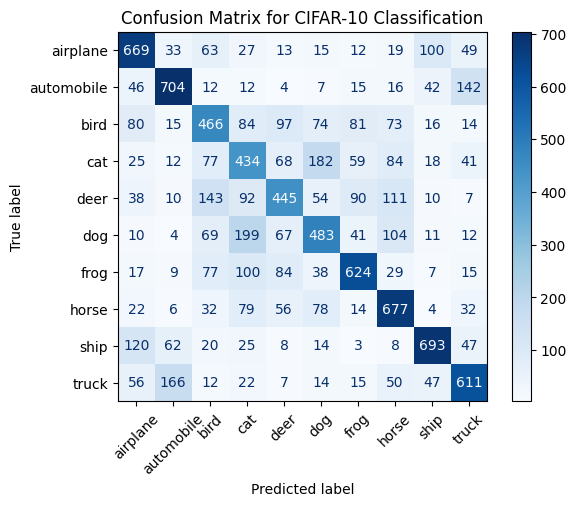

In [34]:
model_vgg.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Train the model
history = model_simple.fit(
    x_train, y_train_onehot,
    epochs=10, batch_size=512,
    validation_data=(x_test, y_test_onehot)
)

# Predict the classes for the test set
y_pred = np.argmax(model_simple.predict(x_test), axis=1)
y_true = np.squeeze(y_test)  # Original test labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for CIFAR-10 Classification")
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:


Activation functions add non-linearity to the network, helping it learn complex patterns. Without them, the model would only learn linear relationships.
_

2 - Key Differences between sigmoid and softmax:


Sigmoid is used for binary classification, giving a value between 0 and 1. Softmax is for multi-class classification, providing probabilities for all classes that sum to 1.
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_Categorical crossentropy is for multi-class problems with one-hot encoded labels. Binary crossentropy is for two-class problems with 0 or 1 labels.
